In [5]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

import olympus
from olympus.scalarizers import Scalarizer
from olympus.datasets import Dataset

In [6]:
def num_eval_to_x(res, pd, dl, ee):
    num_evals = []
    for r in res:
        good_evals = r.index[(r['particle_diameter']<=np.log10(pd))&(r['drug_loading']>=dl)&(r['encap_efficiency']>=ee)].tolist()
        if not good_evals == []:
            num_evals.append(np.amin(good_evals)+1)
        else:
            num_evals.append(r.shape[0]) # budget evals
    return num_evals, np.mean(num_evals), np.median(num_evals), np.std(num_evals)

In [26]:
# load resulsts
raw_res_rand = pickle.load(open('../random/results.pkl', 'rb'))
raw_res_grid = pickle.load(open('../grid/results.pkl', 'rb'))
raw_res_grid_5 = pickle.load(open('../grid_5/results.pkl', 'rb'))
raw_res_grid_10 = pickle.load(open('../grid_10/results.pkl', 'rb'))
raw_res_bo_1 = pickle.load(open('../botorch_1/results.pkl', 'rb'))
raw_res_bo_5 = pickle.load(open('../botorch_5/results.pkl', 'rb'))
raw_res_bo_10 = pickle.load(open('../botorch_10/results.pkl', 'rb'))
raw_res_bo_32 = pickle.load(open('../botorch_32/results.pkl', 'rb'))


print(len(raw_res_rand))
print(len(raw_res_grid))
print(len(raw_res_grid_5))
print(len(raw_res_grid_10))
print(len(raw_res_bo_1))
print(len(raw_res_bo_5))
print(len(raw_res_bo_10))
print(len(raw_res_bo_32))

dataset = Dataset('lnp3')

scalarizer = Scalarizer(
        kind='Hypervolume',
        value_space=dataset.value_space,
        goals=['max', 'max', 'min'],
    )


def unpack_results(res):
    
    num_iter = res[0].shape[0]
    new_dfs = []
    
    for ix in range(len(res)):
        r = res[ix]
        scal = scalarizer.scalarize(
            r.loc[:, ['drug_loading', 'encap_efficiency', 'particle_diameter']].values
        )
        trace_best_ix = [np.argmin(scal[:i+1]) for i in range(len(scal))]
        trace0 = [r.loc[i, 'drug_loading'] for i in trace_best_ix]
        trace1 = [r.loc[i, 'encap_efficiency'] for i in trace_best_ix]
        trace2 = [r.loc[i, 'particle_diameter'] for i in trace_best_ix] 
        r['iter'] = np.arange(r.shape[0])+1
        r['repeat'] = ix
        r['best_drug_loading'] = trace0
        r['best_encap_efficiency'] = trace1
        r['best_particle_diameter'] = 10**np.array(trace2)
        new_dfs.append(r)
        
    return pd.concat(new_dfs, ignore_index=True)
        
        
res_rand = unpack_results(raw_res_rand)
res_grid = unpack_results(raw_res_grid)
res_grid_5 = unpack_results(raw_res_grid_5)
res_grid_10 = unpack_results(raw_res_grid_10)
res_bo_1 = unpack_results(raw_res_bo_1)
res_bo_5 = unpack_results(raw_res_bo_5)
res_bo_10 = unpack_results(raw_res_bo_10)
res_bo_32 = unpack_results(raw_res_bo_32)


50
50
50
50
40
40
40
40


In [27]:
pdi = 15
dl = 0.19
ee = 0.6
num_evals_rand, mean_rand, med_rand, _ = num_eval_to_x(raw_res_rand, pdi, dl, ee)
num_evals_grid, mean_grid, med_grid, _ = num_eval_to_x(raw_res_grid, pdi, dl, ee)
num_evals_grid_5, mean_grid_5, med_grid_5, _ = num_eval_to_x(raw_res_grid_5, pdi, dl, ee)
num_evals_grid_10, mean_grid_10, med_grid_10, _ = num_eval_to_x(raw_res_grid_10, pdi, dl, ee)
num_evals_bo_1, mean_bo_1, med_bo_1, _ = num_eval_to_x(raw_res_bo_1, pdi, dl, ee)
num_evals_bo_5, mean_bo_5, med_bo_5, _ = num_eval_to_x(raw_res_bo_5, pdi, dl, ee)
num_evals_bo_10, mean_bo_10, med_bo_10, _ = num_eval_to_x(raw_res_bo_10, pdi, dl, ee)
num_evals_bo_32, mean_bo_32, med_bo_32, _ = num_eval_to_x(raw_res_bo_32, pdi, dl, ee)

num_evals_list = []
for n in num_evals_rand:
    num_evals_list.append({'method': 'rand', 'num_evals': n})
for n in num_evals_grid:
    num_evals_list.append({'method': 'grid', 'num_evals': n})
for n in num_evals_grid_5:
    num_evals_list.append({'method': 'grid_5', 'num_evals': n})
for n in num_evals_grid_10:
    num_evals_list.append({'method': 'grid_10', 'num_evals': n})
for n in num_evals_bo_1:
    num_evals_list.append({'method': 'bo_1', 'num_evals': n})
for n in num_evals_bo_5:
    num_evals_list.append({'method': 'bo_5', 'num_evals': n})
for n in num_evals_bo_10:
    num_evals_list.append({'method': 'bo_10', 'num_evals': n})
for n in num_evals_bo_32:
    num_evals_list.append({'method': 'bo_32', 'num_evals': n})



num_evals = pd.DataFrame(num_evals_list)

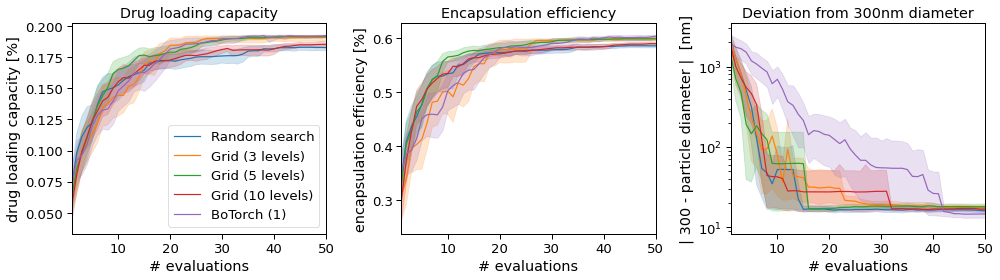

In [28]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(14, 4))

sns.lineplot(data=res_rand, x='iter', y='best_drug_loading', ax=ax0, label='Random search')
sns.lineplot(data=res_rand, x='iter', y='best_encap_efficiency', ax=ax1)
sns.lineplot(data=res_rand, x='iter', y='best_particle_diameter', ax=ax2)

sns.lineplot(data=res_grid, x='iter', y='best_drug_loading', ax=ax0, label='Grid (3 levels)')
sns.lineplot(data=res_grid, x='iter', y='best_encap_efficiency', ax=ax1)
sns.lineplot(data=res_grid, x='iter', y='best_particle_diameter', ax=ax2)


sns.lineplot(data=res_grid_5, x='iter', y='best_drug_loading', ax=ax0, label='Grid (5 levels)')
sns.lineplot(data=res_grid_5, x='iter', y='best_encap_efficiency', ax=ax1)
sns.lineplot(data=res_grid_5, x='iter', y='best_particle_diameter', ax=ax2)

sns.lineplot(data=res_grid_10, x='iter', y='best_drug_loading', ax=ax0, label='Grid (10 levels)')
sns.lineplot(data=res_grid_10, x='iter', y='best_encap_efficiency', ax=ax1)
sns.lineplot(data=res_grid_10, x='iter', y='best_particle_diameter', ax=ax2)

sns.lineplot(data=res_bo_1, x='iter', y='best_drug_loading', ax=ax0, label='BoTorch (1)')
sns.lineplot(data=res_bo_1, x='iter', y='best_encap_efficiency', ax=ax1)
sns.lineplot(data=res_bo_1, x='iter', y='best_particle_diameter', ax=ax2)

# sns.lineplot(data=res_bo_5, x='iter', y='best_drug_loading', ax=ax0, label='BoTorch (10)')
# sns.lineplot(data=res_bo_5, x='iter', y='best_encap_efficiency', ax=ax1)
# sns.lineplot(data=res_bo_5, x='iter', y='best_particle_diameter', ax=ax2)


# sns.lineplot(data=res_bo_32, x='iter', y='best_drug_loading', ax=ax0, label='BoTorch (32)')
# sns.lineplot(data=res_bo_32, x='iter', y='best_encap_efficiency', ax=ax1)
# sns.lineplot(data=res_bo_32, x='iter', y='best_particle_diameter', ax=ax2)

# sns.lineplot(data=res_bo, x='iter', y='best_particle_diameter', ax=ax0, label='BoTorch (mixed kernel, EI, 10)')
# sns.lineplot(data=res_bo, x='iter', y='best_drug_loading', ax=ax1)

# sns.lineplot(data=res_bo_5, x='iter', y='best_particle_diameter', ax=ax0, label='BoTorch (mixed kernel, EI, 5)')
# sns.lineplot(data=res_bo_5, x='iter', y='best_drug_loading', ax=ax1)

# ax0.set_yscale('log')

ax0.set_title('Drug loading capacity')
ax1.set_title('Encapsulation efficiency')
ax2.set_title('Deviation from 300nm diameter')

ax2.set_yscale('log')
# ax0.set_ylim(0.9, 2.6)
# ax0.set_yscale('log')
# ax1.set_ylim(0.05, 0.205)
ax0.set_xlim(1, 50)
ax1.set_xlim(1, 50)
ax2.set_xlim(1, 50)

ax0.set_xlabel('# evaluations')
ax1.set_xlabel('# evaluations')
ax2.set_xlabel('# evaluations')

ax0.set_ylabel('drug loading capacity [%]')
ax1.set_ylabel('encapsulation efficiency [%]')
ax2.set_ylabel('| 300 - particle diameter |  [nm]')

# ax0.axvline(10, lw=2, ls=':', alpha=0.5, c='k')
# ax1.axvline(10, lw=2, ls=':', alpha=0.5, c='k')

plt.tight_layout()
#plt.savefig('traces_three_objs.png', dpi=400)

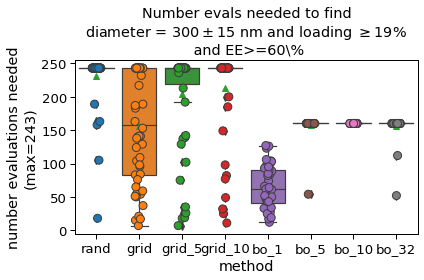

In [30]:
fig, ax0 = plt.subplots(1, 1, figsize=(6, 4))

sns.boxplot(data=num_evals, x='method', y='num_evals', showmeans=True)
sns.stripplot(data=num_evals, x='method', y='num_evals', edgecolor='gray', linewidth=1, size=8)

ax0.set_ylabel('number evaluations needed\n(max=243)')
ax0.set_xlabel('method')

ax0.set_title(f'Number evals needed to find\n'+f'diameter = $300\pm15$ nm'+f' and loading $\geq 19\%$\n' ' and EE>=60\%')

plt.tight_layout()
#plt.savefig('num_evals_needed_three_obj.png', dpi=400)

In [58]:
print(mean_bo_5, mean_grid, mean_rand)
print(med_bo_5, med_grid, med_rand)

34.0625 166.46 233.78
39.5 203.5 243.0


In [59]:
166.46/34.0625

4.8868990825688075

In [60]:
203.5/39.5

5.151898734177215

In [18]:
raw_res_bo_5[0][:20]

,drug_input,solid_lipid,solid_lipid_input,liquid_lipid_input,surfractant_input,drug_loading,encap_efficiency,particle_diameter,iter,repeat,best_drug_loading,best_encap_efficiency,best_particle_diameter
0,40.78502708525248,Stearic_acid,72.69180426450558,1.0445863316699278,0.009222401148508513,0.095722,0.444085,3.599334,1,0,0.095722,0.444085,3974.971684
1,15.011150158460772,Glyceryl_monostearate,76.29766192361798,22.808341205305574,0.00122185714528544,0.021189,0.138965,1.793710,2,0,0.021189,0.138965,62.188481
2,31.502083398193342,Glyceryl_monostearate,111.91839889991843,30.007259687804645,0.00861079122041011,0.042604,0.326840,3.568588,3,0,0.021189,0.138965,62.188481
3,27.977215351941993,Stearic_acid,102.54941230198952,3.987932607284691,0.0013175961569535822,0.045862,0.256277,3.221874,4,0,0.045862,0.256277,1666.762796
4,15.723791876247898,Compritol_888,92.69488274735639,18.84393212398025,0.00947678017570934,0.053893,0.426643,1.335646,5,0,0.053893,0.426643,21.659365
5,28.206312691762314,Glyceryl_monostearate,97.63915769515468,15.756495859496075,0.0075296501193105134,0.037230,0.326745,3.607264,6,0,0.053893,0.426643,21.659365
6,41.58703799030376,Glyceryl_monostearate,95.75532807347746,27.40262063845328,0.00021412949128937287,0.059361,0.168649,1.686025,7,0,0.053893,0.426643,21.659365
7,16.03110091343458,Glyceryl_monostearate,79.65429371574865,41.921573608307675,0.004250116767912519,0.019132,0.189447,3.462157,8,0,0.053893,0.426643,21.659365
8,35.87206276548214,Glyceryl_monostearate,102.52935366473434,1.175604186699958,0.006495072661474646,0.056039,0.359973,3.401749,9,0,0.053893,0.426643,21.659365
9,14.549496145395983,Glyceryl_monostearate,102.20048766604668,21.061074893862113,0.0028338588380805666,0.020043,0.178999,3.193125,10,0,0.053893,0.426643,21.659365


In [ ]:
raw_res_

In [17]:
raw_res_grid[0][:20]

,drug_input,solid_lipid,solid_lipid_input,liquid_lipid_input,surfractant_input,drug_loading,encap_efficiency,particle_diameter,iter,repeat,best_drug_loading,best_encap_efficiency,best_particle_diameter
0,6.0,Glyceryl_monostearate,72.0,0.0,0.005,0.007880,0.159127,3.563363,1,0,0.007880,0.159127,3659.003960
1,27.0,Glyceryl_monostearate,72.0,0.0,0.01,0.030030,0.342896,3.637145,2,0,0.007880,0.159127,3659.003960
2,6.0,Compritol_888,120.0,48.0,0.005,0.012764,0.275794,1.228923,3,0,0.012764,0.275794,16.940375
3,6.0,Stearic_acid,120.0,24.0,0.005,0.008533,0.171401,3.602286,4,0,0.012764,0.275794,16.940375
4,6.0,Glyceryl_monostearate,120.0,0.0,0.0,0.003718,0.099781,1.229601,5,0,0.012764,0.275794,16.940375
5,27.0,Compritol_888,72.0,24.0,0.0,0.027422,0.122427,1.080762,6,0,0.012764,0.275794,16.940375
6,6.0,Compritol_888,72.0,0.0,0.0,0.002860,0.051994,0.983459,7,0,0.012764,0.275794,16.940375
7,27.0,Stearic_acid,72.0,0.0,0.0,0.022749,0.130447,3.147790,8,0,0.012764,0.275794,16.940375
8,6.0,Glyceryl_monostearate,96.0,24.0,0.01,0.004283,0.170614,3.640681,9,0,0.012764,0.275794,16.940375
9,48.0,Stearic_acid,120.0,0.0,0.01,0.119169,0.429281,3.560095,10,0,0.012764,0.275794,16.940375


In [16]:
raw_res_bo_1[0][:20]

,drug_input,solid_lipid,solid_lipid_input,liquid_lipid_input,surfractant_input,drug_loading,encap_efficiency,particle_diameter,iter,repeat,best_drug_loading,best_encap_efficiency,best_particle_diameter
0,26.69313635860152,Compritol_888,80.04910475482109,29.54908568178165,0.00036874038206601955,0.036922,0.136099,1.314010,1,0,0.036922,0.136099,20.606757
1,23.779176712036133,Stearic_acid,113.8686294555664,11.757627487182617,0.0050566899590194225,0.060648,0.351256,3.536146,2,0,0.036922,0.136099,20.606757
2,40.254157919502134,Stearic_acid,96.46377232885088,17.235026997978498,0.003412644945721633,0.118267,0.446818,3.445860,3,0,0.118267,0.446818,2791.641992
3,45.630349277132424,Stearic_acid,102.7468196902384,28.03244304839562,0.00474732755143189,0.164404,0.484204,3.466999,4,0,0.164404,0.484204,2930.883899
4,48.0,Glyceryl_monostearate,115.10082798384575,17.036296943056033,0.005528089814996825,0.083697,0.382566,3.230367,5,0,0.164404,0.484204,2930.883899
5,48.0,Glyceryl_monostearate,120.0,4.4381052433095647e-07,0.01,0.075096,0.396444,3.603949,6,0,0.164404,0.484204,2930.883899
6,48.0,Stearic_acid,119.02571505684381,45.374756942513386,0.004028264217049999,0.176856,0.510372,3.509346,7,0,0.164404,0.484204,2930.883899
7,44.72751251631712,Glyceryl_monostearate,72.79165919696801,8.22535789249974,0.003848458716619418,0.071611,0.261335,2.646262,8,0,0.071611,0.261335,442.855361
8,43.21563547768585,Compritol_888,72.14776154296433,39.329219816705006,0.005056717602847826,0.187733,0.592822,1.241664,9,0,0.187733,0.592822,17.444719
9,47.789004220653624,Compritol_888,72.00000000309394,42.57246839842085,0.00634811011873035,0.193896,0.602560,1.313087,10,0,0.193896,0.602560,20.563041
